# **은행 예금 상품 가입 여부 예측 모델**

- 소스코드 : 여혁수.ipynb
- 모델명 : 여혁수.md

#### 실행 방법 - file_path변수에 테스트 파일이름 입력
#### - 상위메뉴 Run에서 Run All Cells 클릭

#### 데이터 불러오기

In [5]:
import pandas as pd

file_path = 'bank_test.csv'
df = pd.read_csv(file_path)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,32,admin.,single,secondary,no,10218,yes,no,cellular,19,nov,149,2,-1,0,unknown,no
1,35,management,married,tertiary,no,4286,yes,no,unknown,9,may,357,1,-1,0,unknown,no
2,38,management,single,tertiary,no,16957,yes,no,telephone,29,jan,208,1,247,2,failure,no
3,44,management,married,tertiary,no,17361,no,no,unknown,18,jun,476,1,-1,0,unknown,no
4,36,services,married,secondary,no,3064,yes,no,telephone,11,may,1143,4,-1,0,unknown,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        1000 non-null   int64 
 1   job        1000 non-null   object
 2   marital    1000 non-null   object
 3   education  1000 non-null   object
 4   default    1000 non-null   object
 5   balance    1000 non-null   int64 
 6   housing    1000 non-null   object
 7   loan       1000 non-null   object
 8   contact    1000 non-null   object
 9   day        1000 non-null   int64 
 10  month      1000 non-null   object
 11  duration   1000 non-null   int64 
 12  campaign   1000 non-null   int64 
 13  pdays      1000 non-null   int64 
 14  previous   1000 non-null   int64 
 15  poutcome   1000 non-null   object
 16  y          1000 non-null   object
dtypes: int64(7), object(10)
memory usage: 132.9+ KB


#### 결측치는 없음 !!!

In [7]:
value_counts_col = {col: df[col].value_counts() for col in df.columns}

value_counts_col

{'age': 34    55
 32    50
 33    49
 31    40
 38    39
       ..
 86     1
 78     1
 76     1
 70     1
 87     1
 Name: age, Length: 65, dtype: int64,
 'job': management       236
 blue-collar      170
 technician       167
 admin.           113
 services          80
 retired           77
 self-employed     36
 entrepreneur      34
 housemaid         28
 student           27
 unemployed        20
 unknown           12
 Name: job, dtype: int64,
 'marital': married     578
 single      289
 divorced    133
 Name: marital, dtype: int64,
 'education': secondary    488
 tertiary     338
 primary      134
 unknown       40
 Name: education, dtype: int64,
 'default': no     981
 yes     19
 Name: default, dtype: int64,
 'balance':  0       62
  2        6
  4        4
  118      4
  133      4
          ..
 -33       1
  1666     1
  1704     1
  310      1
  1235     1
 Name: balance, Length: 801, dtype: int64,
 'housing': yes    508
 no     492
 Name: housing, dtype: int64,
 'loan': no 

In [8]:
df[['loan', 'housing']].value_counts() # 두 변수 간 큰 상관관계는 없음

loan  housing
no    no         449
      yes        428
yes   yes         80
      no          43
dtype: int64

In [9]:
# 타겟 변수 이진 변수화
df['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

#### 두가지 대출 여부 변수는 서로 관계가 없다고 보임. -> 둘 다 제거하지 않고 유지

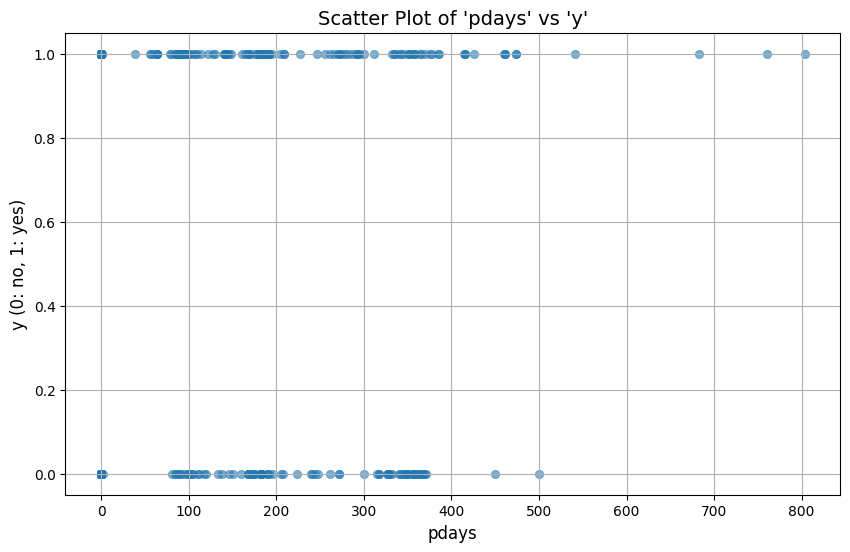

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pdays', y='y', data=df, alpha=0.6, edgecolor=None)
plt.title("Scatter Plot of 'pdays' vs 'y'", fontsize=14)
plt.xlabel('pdays', fontsize=12)
plt.ylabel('y (0: no, 1: yes)', fontsize=12)
plt.grid(True)
plt.show()

#### pdays는 종속변수와 유의미한 관계가 없다고 보여짐.

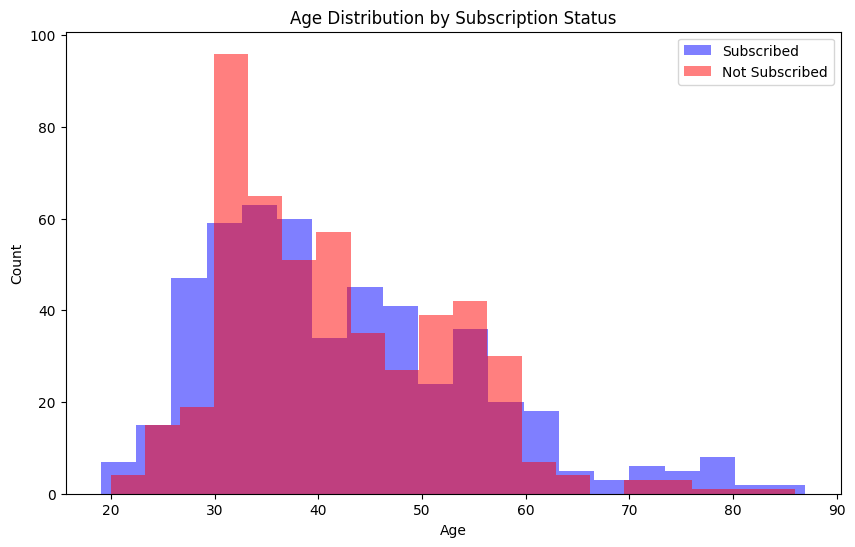

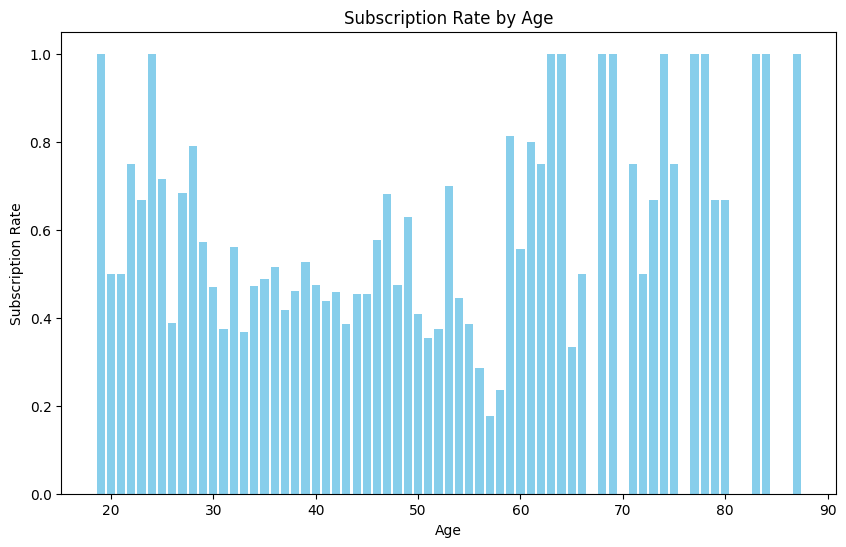

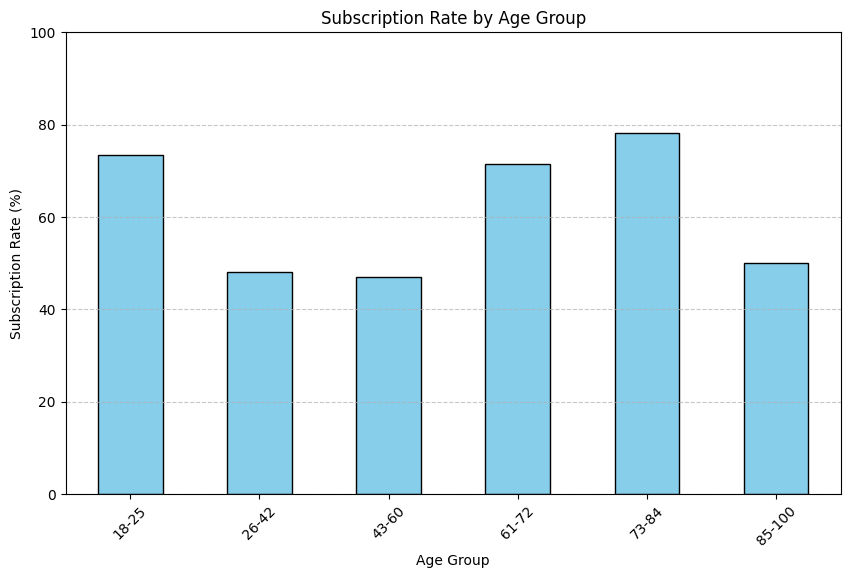

In [11]:
# 가입 여부별 나이 히스토그램
plt.figure(figsize=(10, 6))
plt.hist(
    df[df['y'] == 1]['age'], bins=20, alpha=0.5, label='Subscribed', color='blue'
)
plt.hist(
    df[df['y'] == 0]['age'], bins=20, alpha=0.5, label='Not Subscribed', color='red'
)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution by Subscription Status')
plt.legend()
plt.show()

# 나이별로 가입 비율 계산
age_groups = df.groupby('age')['y'].mean()

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(age_groups.index, age_groups, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Subscription Rate')
plt.title('Subscription Rate by Age')
plt.show()

# 나이 구간 설정 및 그룹화
bins = [18, 26, 43, 61, 73, 85, 100]  # 나이 구간
labels = ['18-25', '26-42', '43-60', '61-72', '73-84', '85-100']  # 레이블 지정
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# 나이대별 가입 비율 계산
age_group_stats = df.groupby('age_group')['y'].mean() * 100  # 비율(%)

# 시각화
plt.figure(figsize=(10, 6))
age_group_stats.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Subscription Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)  # 비율은 0%~100%로 제한
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### 나이대 별로 그룹화 했을 때, 정기예금 가입 비율이 의미 있는 정도로 차이가 나는 모습을 보인다.

1. 제거 고려 대상
(1) 목표와 직접 관련 없는 변수 (contact, day, month)

(2) 정보가 부족한 변수 (default)

(3) 고차원 연속형 변수
pdays: 과거 마케팅 연락 이후 경과 일수로, 값이 다양하며, 실제로 유의미하지 않을 가능성.

In [12]:
df = df.drop(['day', 'month', 'contact', 'default', 'pdays'], axis = 1)

In [13]:
# 원핫 인코딩할 열을 지정
columns_to_encode = ['marital', 'poutcome', 'education', 'job', 'age_group']  # 원하는 컬럼명 리스트

# 지정한 열만 원핫 인코딩
df = pd.get_dummies(df, columns=columns_to_encode, drop_first=False)

df.head()

,age,balance,housing,loan,duration,campaign,previous,y,marital_divorced,marital_married,...,job_student,job_technician,job_unemployed,job_unknown,age_group_18-25,age_group_26-42,age_group_43-60,age_group_61-72,age_group_73-84,age_group_85-100
0,32,10218,yes,no,149,2,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,35,4286,yes,no,357,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,38,16957,yes,no,208,1,2,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,44,17361,no,no,476,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,36,3064,yes,no,1143,4,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [14]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

loan_col = df['loan']
housing_col = df['housing']

le = LabelEncoder()
le.fit(loan_col)
le.fit(housing_col)
df['loan'] = le.transform(loan_col)
df['housing'] = le.transform(housing_col)

In [15]:
# 상관관계 확인
corr = df.corr()
print(corr['y'].sort_values(ascending=False))  # 'y'는 타겟 변수

y                      1.000000e+00
duration               4.748393e-01
poutcome_success       2.761027e-01
previous               1.626107e-01
age_group_73-84        8.672257e-02
age_group_18-25        8.206945e-02
marital_single         8.162402e-02
age_group_61-72        8.161943e-02
job_retired            7.877222e-02
education_tertiary     7.187727e-02
job_student            6.786633e-02
poutcome_other         6.579517e-02
job_unemployed         4.285714e-02
job_management         3.768056e-02
marital_divorced       2.650374e-02
age                    2.415130e-02
balance                2.165931e-02
job_unknown            1.836796e-02
poutcome_failure       1.230915e-02
job_self-employed      1.073594e-02
job_housemaid          7.865380e-18
age_group_85-100      -2.380184e-17
job_admin.            -3.158632e-03
job_technician        -8.043416e-03
education_unknown     -1.020621e-02
job_entrepreneur      -3.310726e-02
education_secondary   -3.601037e-02
job_services          -3.686

In [16]:
# low_corr_features = corr['y'][abs(corr['y']) < 0.05].index

# print("상관계수 0.05 이하의 변수:", low_corr_features)

# 변수 제거
df = df.drop(columns=['age', 'marital_divorced', 'poutcome_failure', 'poutcome_other',
       'education_primary', 'education_secondary', 'education_unknown',
       'job_admin.', 'job_entrepreneur', 'job_housemaid', 'job_management',
       'job_self-employed', 'job_services', 'job_technician', 'job_unemployed',
       'job_unknown', 'age_group_26-42', 'age_group_85-100'])

df.head()

,balance,housing,loan,duration,campaign,previous,y,marital_married,marital_single,poutcome_success,poutcome_unknown,education_tertiary,job_blue-collar,job_retired,job_student,age_group_18-25,age_group_43-60,age_group_61-72,age_group_73-84
0,10218,1,0,149,2,0,0,0,1,0,1,0,0,0,0,0,0,0,0
1,4286,1,0,357,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0
2,16957,1,0,208,1,2,0,0,1,0,0,1,0,0,0,0,0,0,0
3,17361,0,0,476,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0
4,3064,1,0,1143,4,0,0,1,0,0,1,0,0,0,0,0,0,0,0


In [17]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler

# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# scaler.fit(X_test)
# X_test = scaler.transform(X_test)
# scaler.fit(df)
# df = scaler.transform(df)

In [18]:
target = df['y']
df = df.drop('y', axis = 1)

In [19]:
df.shape

(1000, 18)

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
df = scaler.transform(df)

In [21]:
# 클래스 가중치 설정
negative_count = (target == 0).sum()
positive_count = (target == 1).sum()
scale_pos_weight = negative_count / positive_count

scale_pos_weight

1.0

#### 데이터 전처리 단계 끝

#### train, test 분리

In [22]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(df, target,
#                                                     test_size = 0.3, random_state = 42)

In [23]:
# X_train.shape, y_test.shape

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, f1_score, fbeta_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
import numpy as np

#### 베이스 모델 만들기

In [25]:
# from sklearn.linear_model import LogisticRegression

# model_log_reg = LogisticRegression(solver = "saga", class_weight='balanced', C = 0.005, penalty = 'l1')
# model_log_reg.fit(X_train, y_train)

In [26]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression

# # 하이퍼파라미터 그리드 설정
# param_grid = {
#     'C': [0.001, 0.005, 0.01],
#     'penalty': ['l1'],
#     'solver': ['saga']
# }

# # GridSearchCV로 최적의 하이퍼파라미터 탐색
# grid = GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid, cv=5)
# grid.fit(X_train, y_train)

# print("최적 하이퍼파라미터: ", grid.best_params_)
# print("최고 교차 검증 점수: ", grid.best_score_)


In [27]:
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import confusion_matrix, classification_report

# log_pred = model_log_reg.predict(X_test)

# # 정확도 계산
# accuracy = accuracy_score(y_test, log_pred)

# conf_mat = confusion_matrix(y_test, log_pred)
# print(conf_mat)

# train_accuracy = model_log_reg.score(X_train, y_train)
# test_accuracy = model_log_reg.score(X_test, y_test)

# print(f"훈련 데이터 정확도: {train_accuracy:.3f}")
# print(f"테스트 데이터 정확도: {test_accuracy:.3f}")

# print("정확도 no yes: \n   ", conf_mat[0][0] / conf_mat[0].sum(), conf_mat[1][1] / conf_mat[1].sum())

In [28]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import cross_val_score, KFold
# from sklearn.metrics import make_scorer, f1_score, fbeta_score

# estimator = DecisionTreeClassifier()
# cv = KFold(n_splits = 10, random_state=42, shuffle=True)

# scorer = make_scorer(f1_score, pos_label=1)

# parameters = {'max_depth' : [8, 10],
#              'criterion' : ['gini'],
#              'splitter' : ['best'],
#              'min_samples_split' : [2],
#              'min_samples_leaf' : [2],
#               'class_weight': [{0 : 1, 1 : 4}],
#              'max_leaf_nodes' : [20, 24]}

# model = GridSearchCV(estimator = estimator, 
#                     param_grid = parameters,
#                     scoring = scorer,
#                     cv = cv, verbose = 1,
#                     n_jobs = -1, refit = True)

# model.fit(X_train, y_train)

# print("Best Estimator : \n", model.best_estimator_);print()
# print("Best Params : \n", model.best_params_);print()
# print("Best Score : \n", model.best_score_);print()

In [29]:
# import numpy as np
# import matplotlib.pyplot as plt

# model_dt = DecisionTreeClassifier(criterion = 'gini',
#                                max_depth = 10,
#                                max_leaf_nodes = 24,
#                                min_samples_leaf = 2,
#                                min_samples_split = 2,
#                                class_weight = {0 : 1, 1 : 4},
#                                splitter = 'best')
# model_dt.fit(X_train, y_train)
# dt_pred = model_dt.predict(X_test)
# conf_mat = confusion_matrix(y_test, dt_pred)
# print(conf_mat)
# print("정확도 no yes: \n   ", conf_mat[0][0] / conf_mat[0].sum(), conf_mat[1][1] / conf_mat[1].sum())
# train_accuracy = model_dt.score(X_train, y_train)
# test_accuracy = model_dt.score(X_test, y_test)
# print(f"훈련 데이터 정확도: {train_accuracy:.3f}")
# print(f"테스트 데이터 정확도: {test_accuracy:.3f}")
# print("피처 중요도 : \n", model_dt.feature_importances_)

In [30]:
# param_grid = {
#     'n_estimators': [200, 240],
#     'max_depth': [24, 25],
#     'min_samples_split': [4, 5],
#     'min_samples_leaf': [6, 7],
#     'max_features': ['sqrt'],
#     'class_weight' : [{0 : 1, 1 : 4}]
# }

# grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1')
# grid_search.fit(X_train, y_train)

# print("Best parameters:", grid_search.best_params_)

In [31]:
# model_rf = RandomForestClassifier(class_weight = {0 : 1, 1 : 4}, max_depth = 24,
#                                   max_features = 'sqrt', min_samples_leaf = 7,
#                                   min_samples_split = 5, n_estimators = 200)

# model_rf.fit(X_train, y_train)

In [32]:
# rf_pred = model_rf.predict(X_test)
# conf_mat = confusion_matrix(y_test, rf_pred)
# print(conf_mat)
# print("정확도 no yes: \n   ", conf_mat[0][0] / conf_mat[0].sum(), conf_mat[1][1] / conf_mat[1].sum())

# train_accuracy = model_rf.score(X_train, y_train)
# test_accuracy = model_rf.score(X_test, y_test)
# print(f"훈련 데이터 정확도: {train_accuracy:.3f}")
# print(f"테스트 데이터 정확도: {test_accuracy:.3f}")

# print("피처 중요도 : \n", model_rf.feature_importances_)

In [33]:
# from xgboost import XGBClassifier

# # 하이퍼파라미터 그리드 설정
# param_grid = {
#     'n_estimators': [100, 120],
#     'learning_rate': [0.07, 0.05],
#     'max_depth': [6, 7],
#     'min_child_weight': [5],
#     'subsample': [0.8],
#     'colsample_bytree': [0.8],
#     'gamma': [0.07, 0.05]
# }

# # GridSearchCV 설정
# grid_search = GridSearchCV(estimator=XGBClassifier(scale_pos_weight=scale_pos_weight/1.5, random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1')

# # 모델 학습
# grid_search.fit(X_train, y_train)

# # 최적의 하이퍼파라미터 출력
# print("Best parameters:", grid_search.best_params_)

In [34]:
# from xgboost import XGBClassifier
# model_xgb = XGBClassifier(colsample_bytree = 0.8, gamma = 0.07, learning_rate = 0.07,
#                           max_depth = 6, min_child_weight = 5, n_estimators = 120,
#                           subsample = 0.8, scale_pos_weight=scale_pos_weight/1.5, random_state=42)

# model_xgb.fit(X_train, y_train)

# xgb_pred = model_xgb.predict(X_test)
# conf_mat = confusion_matrix(y_test, xgb_pred)
# print(conf_mat)
# print("정확도 no yes: \n   ", conf_mat[0][0] / conf_mat[0].sum(), conf_mat[1][1] / conf_mat[1].sum())

# train_accuracy = model_xgb.score(X_train, y_train)
# test_accuracy = model_xgb.score(X_test, y_test)
# print(f"훈련 데이터 정확도: {train_accuracy:.3f}")
# print(f"테스트 데이터 정확도: {test_accuracy:.3f}")

# print("피처 중요도 : \n", model_xgb.feature_importances_)

In [35]:
# from sklearn.svm import SVC

# # 하이퍼파라미터 그리드 설정
# param_grid = {
#     'C': [0.05, 0.1],
#     'kernel': ['rbf'],
#     'gamma': [0.001],
#     'class_weight': ['balanced']
# }

# # GridSearchCV 설정
# grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='f1', n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # 최적 하이퍼파라미터 출력
# print("Best parameters:", grid_search.best_params_)

In [36]:
# from sklearn.svm import SVC

# model_svc = SVC(C = 0.1, class_weight = 'balanced',
#                 gamma = 0.001, kernel = 'rbf')
# model_svc.fit(X_train, y_train)

# svc_pred = model_svc.predict(X_test)
# conf_mat = confusion_matrix(y_test, svc_pred)
# print(conf_mat)
# print("정확도 : ", conf_mat[0][0] / conf_mat[0].sum(), conf_mat[1][1] / conf_mat[1].sum())

# train_accuracy = model_svc.score(X_train, y_train)
# test_accuracy = model_svc.score(X_test, y_test)
# print(f"훈련 데이터 정확도: {train_accuracy:.3f}")
# print(f"테스트 데이터 정확도: {test_accuracy:.3f}")

In [37]:
# import pickle

# with open('model_rf.md', 'wb') as f:
#     pickle.dump(model_rf, f)

# with open('model_xgb.md', 'wb') as f:
#     pickle.dump(model_xgb, f)

# with open('model_svc.md', 'wb') as f:
#     pickle.dump(model_svc, f)

# with open('model_dt.md', 'wb') as f:
#     pickle.dump(model_dt, f)

# with open('model_log.md', 'wb') as f:
#     pickle.dump(model_log_reg, f)

# with open('best_model.md', 'wb') as f:
#     pickle.dump(best_model, f)

In [38]:
# from sklearn.ensemble import StackingClassifier
# from sklearn.linear_model import LogisticRegression

# # Base Models
# base_models = [
#     ('rf', model_rf),
#     ('xgb', model_xgb),
#     ('svc', model_svc),
#     ('dt', model_dt),
#     ('log', model_log_reg)
# ]

# # Meta Model

# # Custom Scorer
# f1_scorer = make_scorer(f1_score, pos_label=1)

# meta_model = LogisticRegression(class_weight='balanced', random_state=42)

# # 스태킹 분류기 정의
# stacking_clf = StackingClassifier(
#     estimators=base_models,
#     final_estimator=meta_model
# )

# # 하이퍼파라미터 그리드 정의
# param_grid = {
#     'final_estimator__C': [0.01],  # 최종 로지스틱 회귀의 C 파라미터
# }

# # GridSearchCV 설정 (f1_score 사용)
# grid = GridSearchCV(
#     estimator=stacking_clf,
#     param_grid=param_grid,
#     scoring=f1_scorer,  # f1_score를 스코어로 설정
#     cv=5,  # 5-폴드 교차 검증
#     verbose=2,  # 진행 상황 표시
# )

# # 학습
# grid.fit(X_train, y_train)

# # 결과 출력
# print("Best parameters found:", grid.best_params_)
# print("Best F1 score:", grid.best_score_)

# # 최적 모델로 예측
# best_model = grid.best_estimator_
# y_pred = best_model.predict(X_test)
# print(classification_report(y_test, y_pred))


In [39]:
# conf_mat = confusion_matrix(y_test, y_pred)
# print(conf_mat)
# print("정확도 : ", conf_mat[0][0] / conf_mat[0].sum(), conf_mat[1][1] / conf_mat[1].sum())
# print((conf_mat[0][0]+conf_mat[1][1]) / conf_mat.sum())

In [40]:
import pickle

with open('여혁수.md', 'rb') as f:
    best_model = pickle.load(f)

#### df : 독립변수 데이터, target : 종속변수 데이터

In [41]:
y_pred = best_model.predict(df)

In [42]:
conf_mat = confusion_matrix(target, y_pred)
print(conf_mat)
print("정확도 no yes:\n\t\t ", conf_mat[0][0] / conf_mat[0].sum(), conf_mat[1][1] / conf_mat[1].sum())
accuracy = accuracy_score(target, y_pred)
print(f"모델 정확도: {accuracy:.3f}")

[[471  29]
 [224 276]]
정확도 no yes:
		  0.942 0.552
모델 정확도: 0.747
